In [4]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


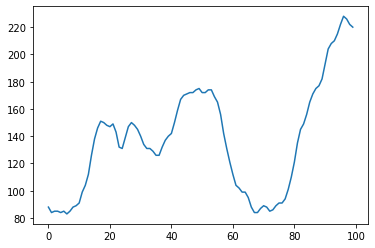

In [6]:
path = '/content/drive/MyDrive/time series/time_series.csv'
df = pd.read_csv(path)
plt.plot(df)

In [7]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(df,autolag='AIC')
print('statistics: ',adf[0])
print('pvalue: ',adf[1])

statistics:  -2.464239717203369
pvalue:  0.12441935447109442


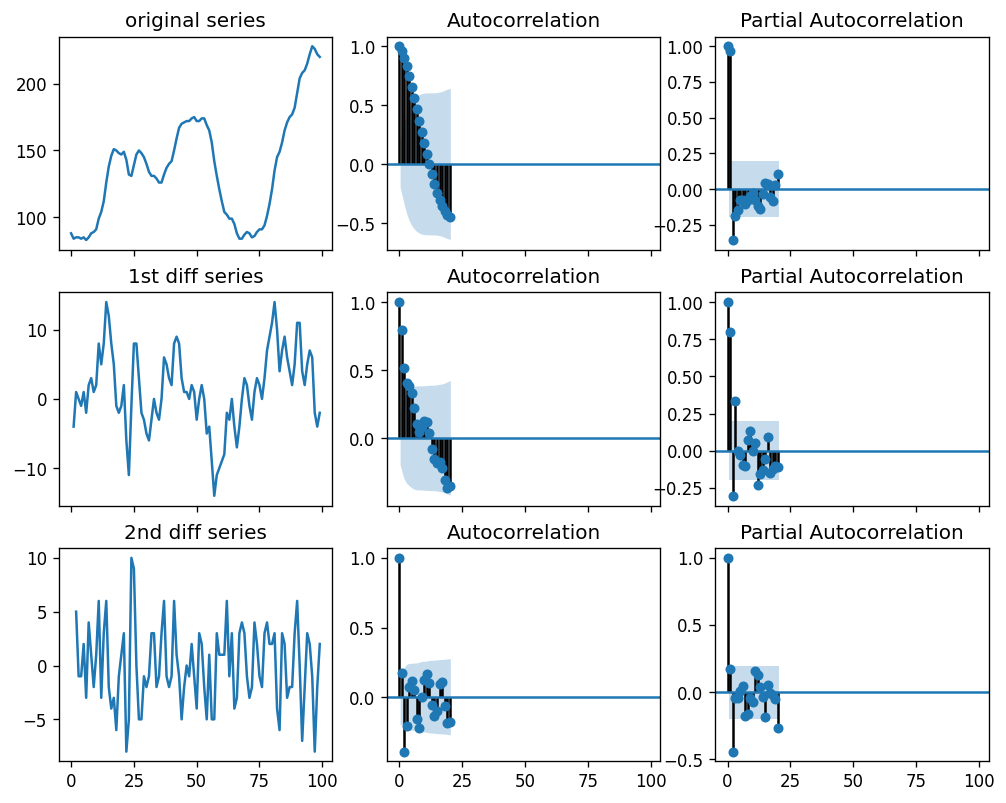

In [10]:
fig, axes = plt.subplots(3,3, sharex=True)


plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':120})

axes[0,0].plot(df)
axes[0,0].set_title('original series')
plot_acf(df,ax=axes[0,1])
plot_pacf(df.dropna(), ax=axes[0,2])

axes[1,0].plot(df.diff())
axes[1,0].set_title('1st diff series')
plot_acf(df.diff().dropna(),ax=axes[1,1])
plot_pacf(df.diff().dropna(), ax=axes[1,2])

axes[2,0].plot(df.diff().diff())
axes[2,0].set_title('2nd diff series')
plot_acf(df.diff().diff().dropna(),ax=axes[2,1])
plot_pacf(df.diff().diff().dropna(), ax=axes[2,2])

plt.show()



In [12]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df.dropna(), order=(2,1,3))
model_fit = model.fit(disp=0)

print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.x   No. Observations:                   99
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -251.701
Method:                       css-mle   S.D. of innovations              3.050
Date:                Wed, 09 Nov 2022   AIC                            517.402
Time:                        08:56:40   BIC                            535.568
Sample:                             1   HQIC                           524.752
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0049      1.584      0.635      0.526      -2.099       4.109
ar.L1.D.x      0.5502      0.299      1.840      0.066      -0.036       1.136
ar.L2.D.x      0.2364      0.217      1.091      0.2

In [13]:
res = pd.DataFrame(model_fit.resid)

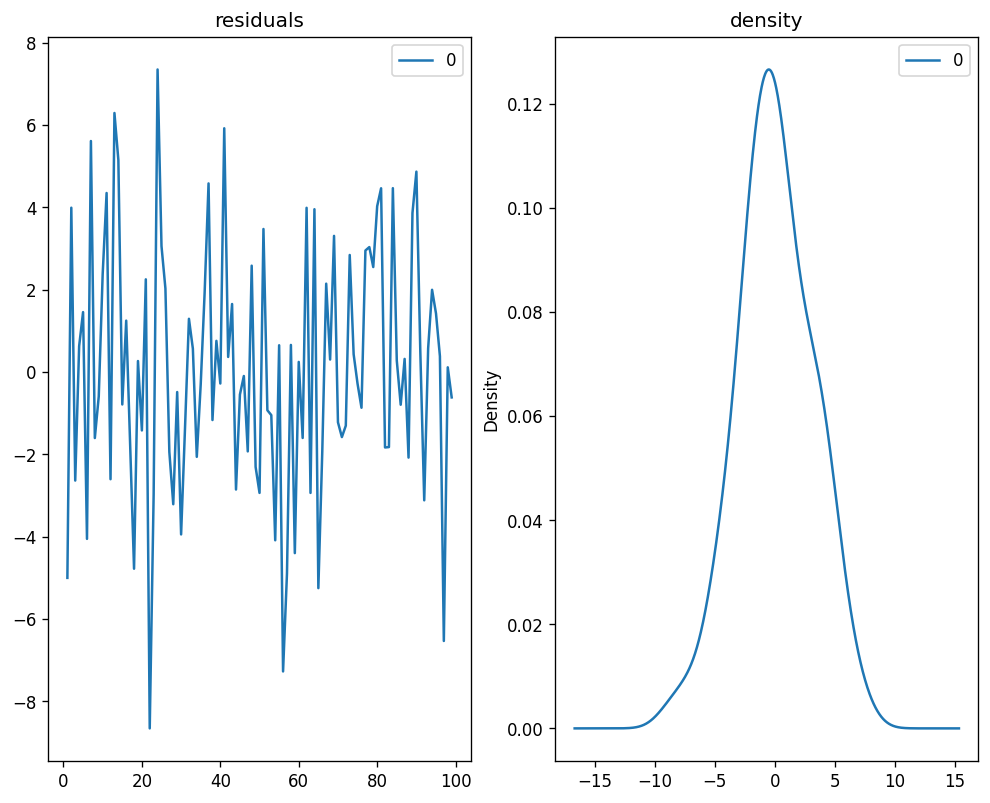

In [14]:
fig, axes = plt.subplots(1,2)

res.plot(title='residuals',ax=axes[0])
res.plot(kind='kde',title='density',ax=axes[1])
plt.show()

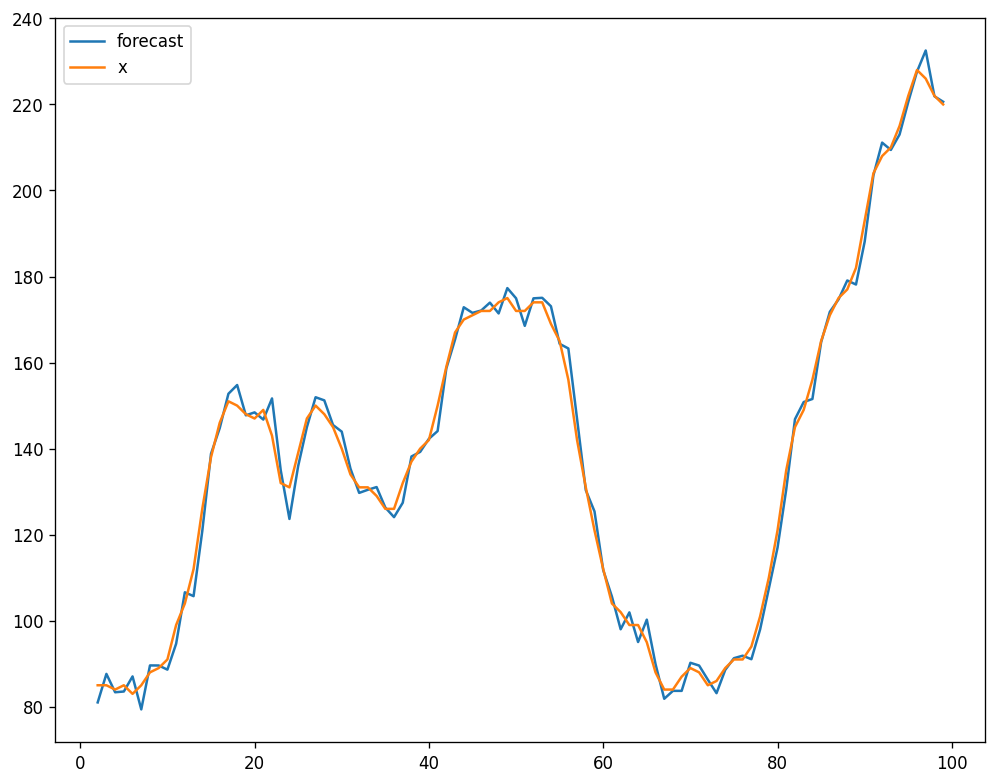

In [15]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [16]:
train = df[:85]
test = df[85:]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


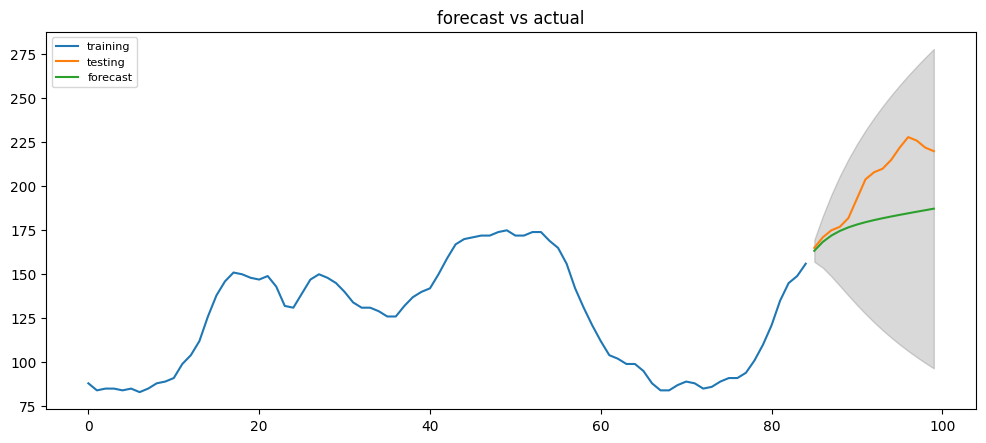

In [17]:
model = ARIMA(train, order=(1,1,1))

fitted = model.fit(disp=1)

fc, se, conf = fitted.forecast(15, alpha=0.05)

fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:,0],index=test.index)
upper_series  = pd.Series(conf[:,1],index=test.index)

plt.figure(figsize=(12,5),dpi=100)

plt.plot(train, label='training')

plt.plot(test, label='testing')

plt.plot(fc_series, label='forecast')

plt.fill_between(lower_series.index, lower_series, upper_series, color='k',alpha=.15)

plt.title('forecast vs actual')
plt.legend(loc='upper left',fontsize=8)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


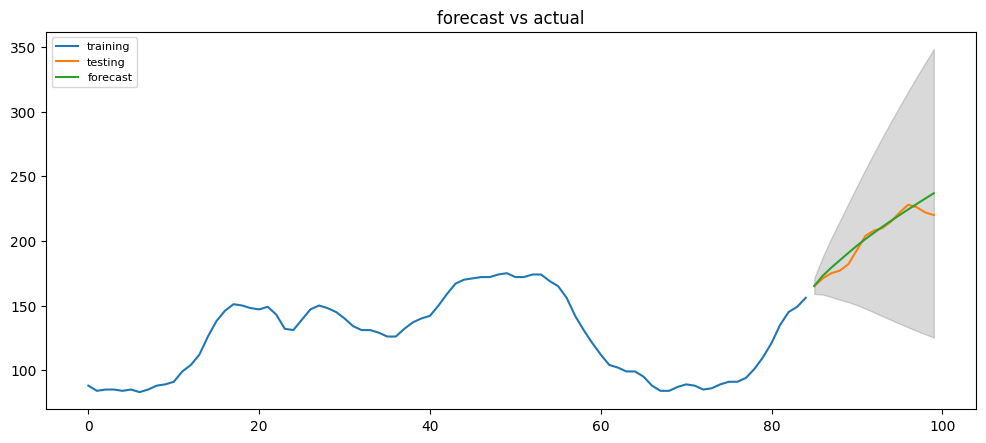

In [18]:
model = ARIMA(train, order=(3,2,1))

fitted = model.fit(disp=1)

fc, se, conf = fitted.forecast(15, alpha=0.05)

fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:,0],index=test.index)
upper_series  = pd.Series(conf[:,1],index=test.index)

plt.figure(figsize=(12,5),dpi=100)

plt.plot(train, label='training')

plt.plot(test, label='testing')

plt.plot(fc_series, label='forecast')

plt.fill_between(lower_series.index, lower_series, upper_series, color='k',alpha=.15)

plt.title('forecast vs actual')
plt.legend(loc='upper left',fontsize=8)
plt.show()

In [19]:
forecast = fc
actual = test.values

mape = np.mean(np.abs(forecast-actual)/np.abs(actual))
mape

0.12756583881964553